# 1. Setting Up

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import inaugural
from nltk import ConditionalFreqDist
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# 2(a). Loading the Dataset

We will be analyzing the dataset of the inaugural speeches by US presidents. Let's explore the dataset.

In [54]:
raw_data = []
for fileid in inaugural.fileids():
    raw_data.append([fileid, " ".join(inaugural.words(fileid))])
data = pd.DataFrame(raw_data, columns=["File ID", "Text"])
data

**Discussion**: Biden is the 46th president. Why are there 59 inaugural speeches?

# 2(b). Vectorize the Text

As we learnt in lecture, one way to vectorize text is using the [Term Frequency Inverse Document Frequency](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) (TF-IDF) featurizer. 

Save the vocabulary in a variable `words`.

Print the shape of your dataset. 

**Discussion**: What does each dimension stand for?

Print the stop words. 

**Discussion**: Do you think this is a reasonable list of stopwords?

# 3. Running K-Means

We will now run k-means to cluster the dataset, using sklearn's [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Set `random_state=416`.

In [58]:
k = 5


For visualization purposes, let's add the cluster labels to the pandas dataframe.

In [59]:
data["Clusters k=%d" % k] = kmeans.labels_
data

**Discussion**: What trends do you observe? What underlying patterns might the clustering algorithm have picked up on?

To further analyze the clusters, let's print the most frequent words per cluster.

In [17]:
cluster_to_words_to_num_occurences = {}
for i in range(k):
    cluster_to_words_to_num_occurences[i] = {}
    for word in words:
        num_occurences = 0
        for _, text in data[(data["Clusters k=%d" % k] == i)]["Text"].iteritems():
            if word.lower() in text.lower().split(" "):
                num_occurences += 1
        cluster_to_words_to_num_occurences[i][word] = num_occurences

num_words = 10
for i in range(k):
    top_words = [(cluster_to_words_to_num_occurences[i][word], word) for word in cluster_to_words_to_num_occurences[i]]
    top_words.sort(reverse=True)
    print("Cluster %d: " % i, top_words[:num_words])

**Discussion**: What words are common across all clusters? What words are more unique to particular clusters?

**Discussion**: Why do the clusters not correspond to meaningful topics of words?

# 4. Selecting K

Sklearn's KMeans classifier's `inertia_` property returns the objective function, or quality, of the clustering. 

**Discussion**: What would we expect the inertia to be when k=59?

In [18]:
ks = []
inertias = []
for k in range(1, 60, 2):
    # TODO: train a classifier with this k compute its quality
    pass

Graph it out

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ks, inertias, marker='o')
ax.set_ylim(0, 50)
ax.set_xlabel("K")
ax.set_ylabel("Objective Function")
ax.set_xticks(range(0, ks[-1], 2), minor=True)
ax.grid(which='both')

**Discussion**: What appears to be the best value of k?

# 5. (Bonus) Exploring the Data!

The below function takes in a list of words and graphs their occurance in presidents' speeches over the years. Use it to identify trends in the data!

In [31]:
def words_over_time(words):
    cfd = ConditionalFreqDist(
        (target, int(fileid[:4]))
        for fileid in inaugural.fileids()
        for w in inaugural.words(fileid)
        for target in words
        if w.lower().startswith(target))
    cfd.plot()

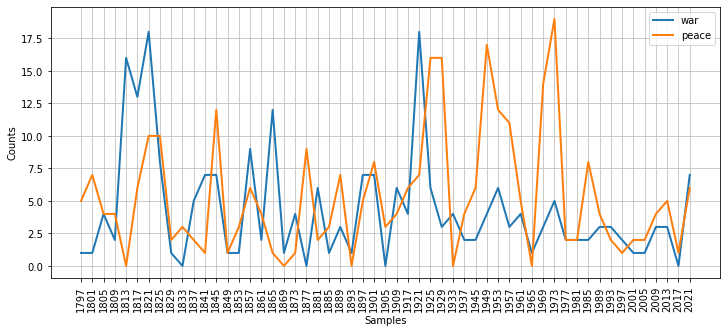

In [52]:
plt.figure(figsize=(12, 5))
words_over_time(["war", "peace"])